In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
## Loading the datasets

df_user_profile = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/userprofile.csv')
df_payment_method = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/userpayment.csv')
df_cuisine = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/chefmozcuisine.csv')
df_operating_hours = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/chefmozhours4.csv')
df_parking = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/chefmozparking.csv')
df_location = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/geoplaces2.csv', encoding='latin1')
df_rating = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/rating_final.csv')
df_payment_type_accepted = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/chefmozaccepts.csv')
df_user_cuisine = pd.read_csv('C:/Users/12367/Desktop/Python Files/resturnats rating/usercuisine.csv')

In [135]:
df_park = df_rating.merge(df_parking, on='placeID')
df_park.head()

,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2,2,2,public
1,U1108,135085,1,2,1,public
2,U1081,135085,1,2,1,public
3,U1056,135085,2,2,2,public
4,U1134,135085,2,1,2,public


In [136]:
df_park['parking_lot'].value_counts()

none             561
yes              389
public           182
valet parking     29
Name: parking_lot, dtype: int64

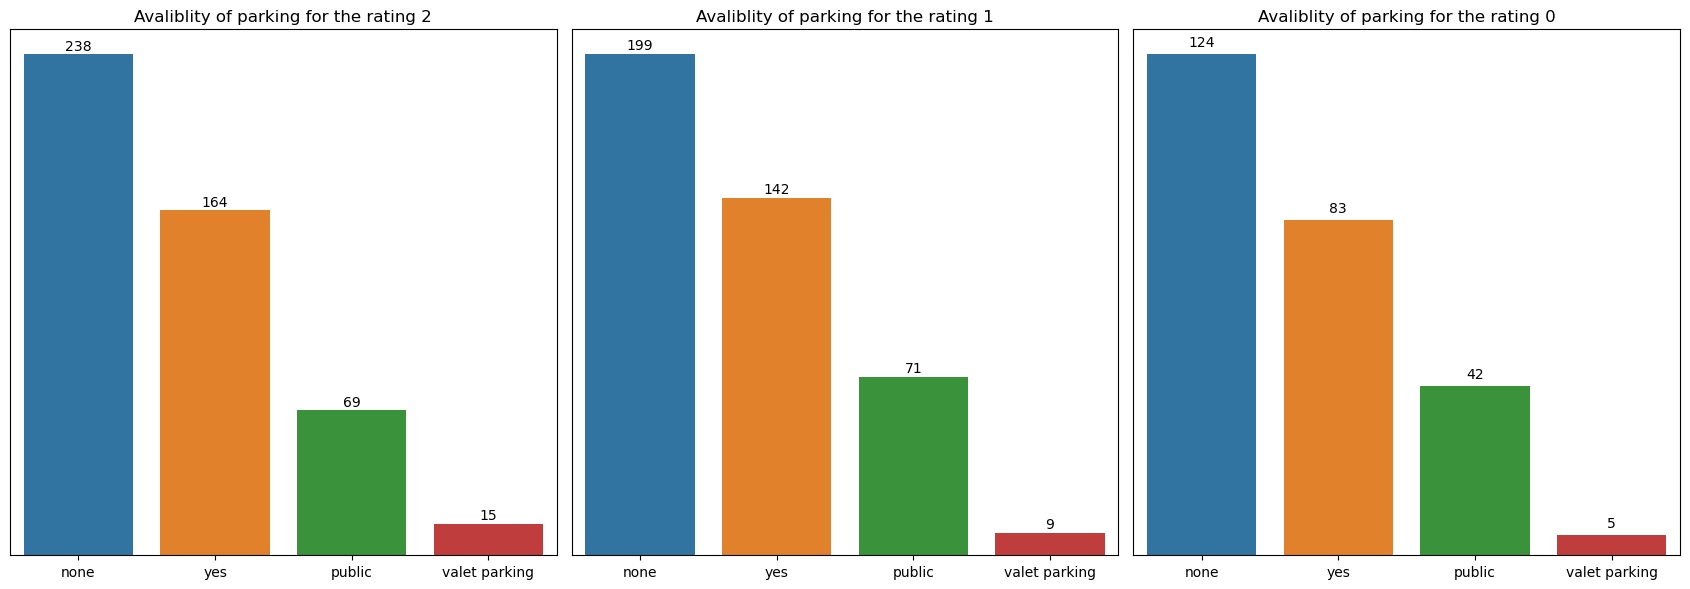

In [138]:
rating_categories = df_park['rating'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(rating_categories), figsize=(17, len(rating_categories)*2))

for i, rating in enumerate(rating_categories):
    data = df_park[df_park['rating'] == rating]
    value_count_rat = data['parking_lot'].value_counts().reset_index()

    ax = axes[i]
    sns.barplot(data=value_count_rat, x='index', y='parking_lot', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_title(f'Avaliblity of parking for the rating {rating}')

    for index, row in value_count_rat.iterrows():
        ax.text(index, row['parking_lot']+2, row['parking_lot'], color='black', ha='center')

plt.tight_layout()


In [100]:
df_location.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [101]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


In [102]:
df_res_rating = df_rating.merge(df_location, on='placeID')
df_res_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1160
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userID          1161 non-null   object 
 1   placeID         1161 non-null   int64  
 2   rating          1161 non-null   int64  
 3   food_rating     1161 non-null   int64  
 4   service_rating  1161 non-null   int64  
 5   latitude        1161 non-null   float64
 6   longitude       1161 non-null   float64
 7   the_geom_meter  1161 non-null   object 
 8   name            1161 non-null   object 
 9   address         1161 non-null   object 
 10  city            1161 non-null   object 
 11  state           1161 non-null   object 
 12  country         1161 non-null   object 
 13  fax             1161 non-null   object 
 14  zip             1161 non-null   object 
 15  alcohol         1161 non-null   object 
 16  smoking_area    1161 non-null   object 
 17  dress_code      1161 non-null   o

In [124]:
df_res_rating['smoking_area'].value_counts()

none             636
section          232
not permitted    225
permitted         49
only at bar       19
Name: smoking_area, dtype: int64

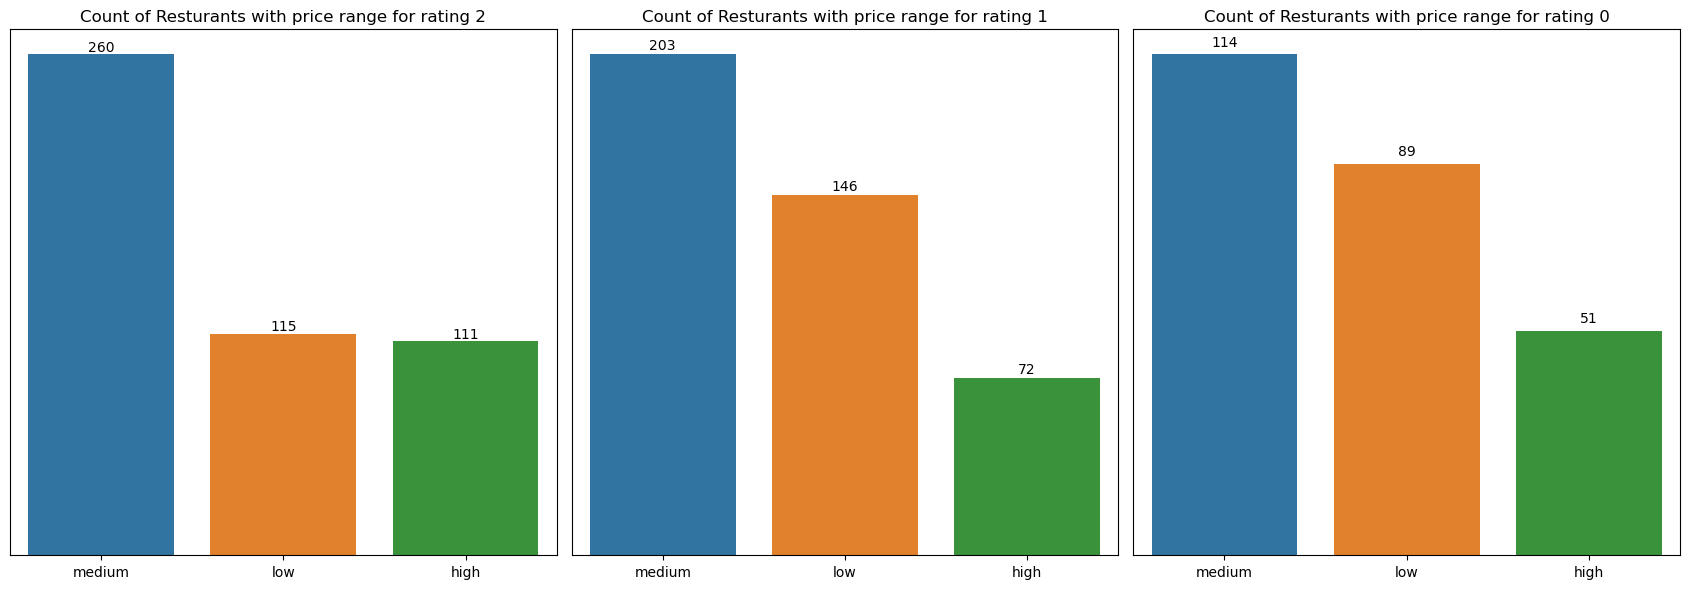

In [134]:
rating_categories = df_res_rating['rating'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(rating_categories), figsize=(17, len(rating_categories)*2))

for i, rating in enumerate(rating_categories):
    data = df_res_rating[df_res_rating['rating'] == rating]
    value_count_price = data['price'].value_counts().reset_index()

    ax=axes[i]
    sns.barplot(data=value_count_price, x='index', y='price', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_title(f'Count of Resturants with price range for rating {rating}')

    for index, row in value_count_price.iterrows():
        ax.text(index, row['price']+2, row['price'], color='black', ha='center')
    
    plt.tight_layout()

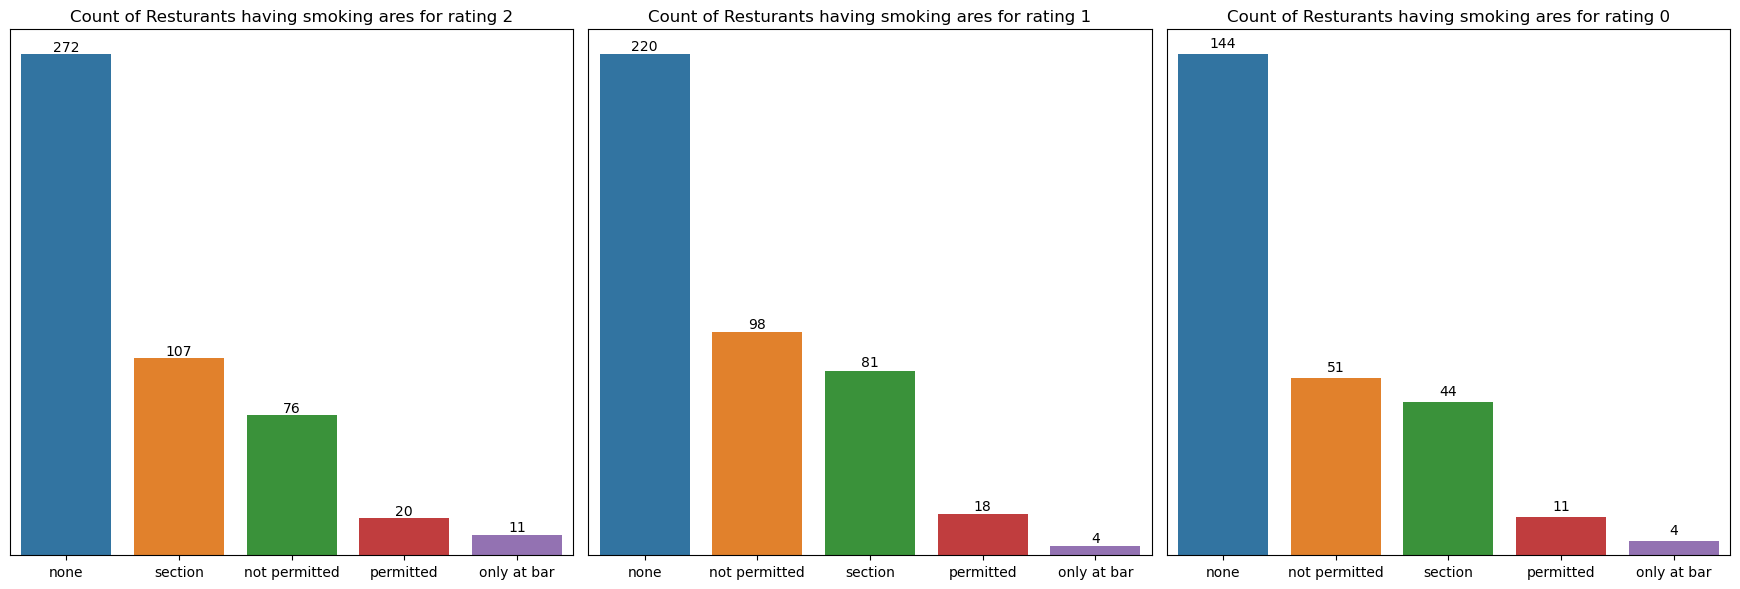

In [130]:
#Check if there is a relation between the rating and the smoking permision

rating_categories = df_res_rating['rating'].unique()

fig,axes = plt.subplots(nrows=1,ncols=len(rating_categories), figsize=(17.5, len(rating_categories)*2))

for i, rating in enumerate(rating_categories):
    data = df_res_rating[df_res_rating['rating'] == rating]
    value_count_rate = data['smoking_area'].value_counts().reset_index()

    axa = axes[i]
    sns.barplot(data=value_count_rate, x='index', y='smoking_area', ax=axa)
    axa.set_xlabel('')
    axa.set_ylabel('')
    axa.set_yticks([])
    axa.set_title(f'Count of Resturants having smoking ares for rating {rating}')

    for index, row in value_count_rate.iterrows():
        axa.text(index, row['smoking_area']+2, row['smoking_area'], color='black', ha='center')

    plt.tight_layout()

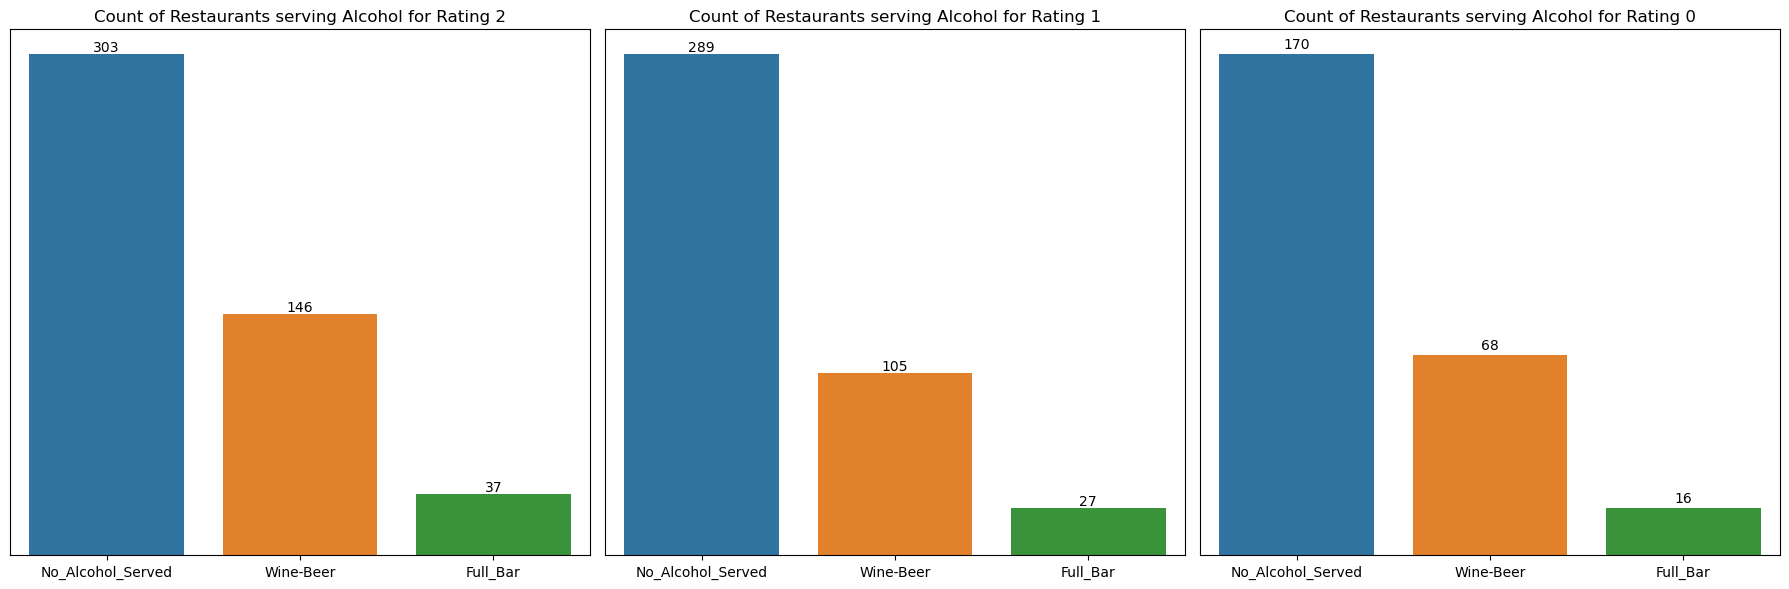

In [103]:
#Check if the rating of the resturant is affected by the service of Alcohol
# Get unique rating categories
rating_categories = df_res_rating['rating'].unique()

# Create subplots based on the number of unique rating categories
fig, axes = plt.subplots(nrows=1, ncols=len(rating_categories), figsize=(18, len(rating_categories)*2))

# Iterate over each rating category and create a bar plot
for i, rating in enumerate(rating_categories):
    # Filter the data for the current rating category
    data = df_res_rating[df_res_rating['rating'] == rating]
    
    # Count the occurrences of alcohol values in the filtered data
    value_counts = data['alcohol'].value_counts().reset_index()
    
    # Create a bar plot in the corresponding subplot
    ax = axes[i]
    sns.barplot(data=value_counts, x='index', y='alcohol', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_title(f'Count of Restaurants serving Alcohol for Rating {rating}')
    
    # Add labels to the bars
    for index, row in value_counts.iterrows():
        ax.text(index, row['alcohol']+2, row['alcohol'], color='black', ha='center')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


In [104]:
df_res_rating['alcohol'].value_counts()

No_Alcohol_Served    762
Wine-Beer            319
Full_Bar              80
Name: alcohol, dtype: int64

Text(0.5, 1.0, 'Count of Resturants serving Alcohol')

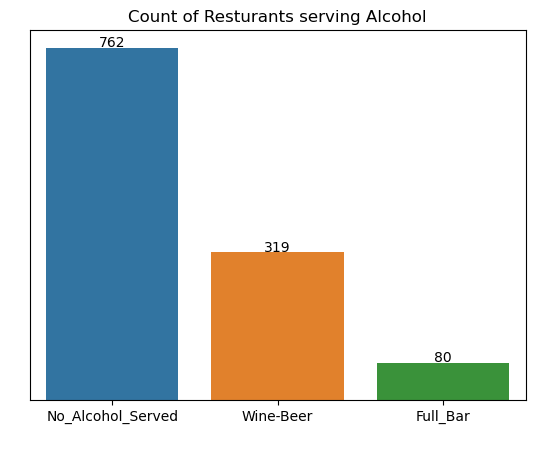

In [105]:
#

value_count_al = df_res_rating['alcohol'].value_counts().reset_index()

f = sns.barplot(data=value_count_al, x='index', y='alcohol')

for index, row in value_count_al.iterrows():
    f.text(index, row['alcohol']+2, row['alcohol'], color='black', ha='center')
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks([])
plt.title('Count of Resturants serving Alcohol')


In [106]:
df_cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [107]:
df_user_profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [108]:
df_payment_method.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [109]:
df_user_cuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [110]:
## Merging the User/Customer datasets on the User ID

df_consumer_Data = df_user_profile.merge(df_payment_method, on='userID').merge(df_user_cuisine, on='userID')
df_consumer_Data.head()



,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,Upayment,Rcuisine
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,none,student,black,69,medium,1.77,cash,American
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,...,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,cash,Mexican
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,...,none,hard-worker,Catholic,student,blue,60,low,1.69,cash,Mexican
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,none,professional,green,44,medium,1.53,cash,Bakery
4,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,...,variety,hard-worker,none,professional,green,44,medium,1.53,cash,Breakfast-Brunch


Text(0.5, 1.0, 'Check the Budget of the Consumers')

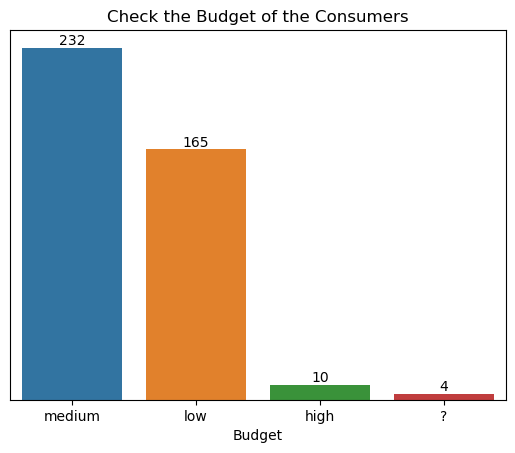

In [132]:
value_count_budget = df_consumer_Data['budget'].value_counts().reset_index()

t = sns.barplot(data=value_count_budget, x='index', y='budget')

for index, row in value_count_budget.iterrows():
    t.text(index, row['budget']+2, row['budget'], color='black', ha='center')

plt.xlabel('Budget')
plt.ylabel('')
plt.yticks([])
plt.title('Check the Budget of the Consumers')

In [111]:
# Check the non null values and the type for each columns
df_consumer_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            411 non-null    object 
 1   latitude          411 non-null    float64
 2   longitude         411 non-null    float64
 3   smoker            411 non-null    object 
 4   drink_level       411 non-null    object 
 5   dress_preference  411 non-null    object 
 6   ambience          411 non-null    object 
 7   transport         411 non-null    object 
 8   marital_status    411 non-null    object 
 9   hijos             411 non-null    object 
 10  birth_year        411 non-null    int64  
 11  interest          411 non-null    object 
 12  personality       411 non-null    object 
 13  religion          411 non-null    object 
 14  activity          411 non-null    object 
 15  color             411 non-null    object 
 16  weight            411 non-null    int64  
 1

In [112]:
df_consumer_Data.isnull().sum()

userID              0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
Upayment            0
Rcuisine            0
dtype: int64

([], [])

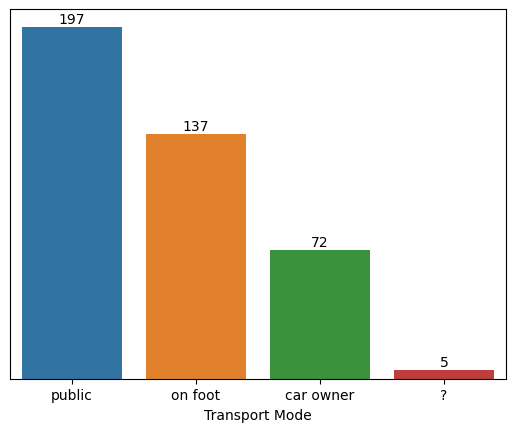

In [139]:
value_count_trans = df_consumer_Data['transport'].value_counts().reset_index()

sns.barplot(data=value_count_trans, x='index', y='transport')
for index, row in value_count_trans.iterrows():
    plt.text(index, row['transport']+2, row['transport'], color='black', ha='center')

plt.xlabel('Transport Mode')
plt.ylabel('')
plt.yticks([])

Text(0.5, 1.0, 'Marital Status Overview')

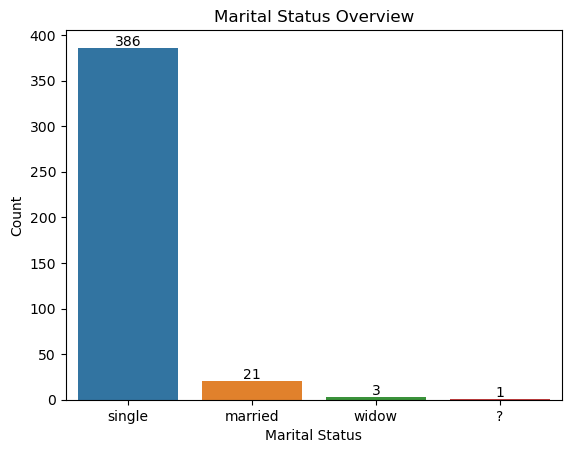

In [113]:
# Check the Marital Status of the Consumers

value_count = df_consumer_Data['marital_status'].value_counts().reset_index()


a = sns.barplot(data=value_count, x='index', y='marital_status')
# Add labels on top of each bar
for index, row in value_count.iterrows():
    a.text(row.name, row.marital_status+2, row.marital_status, color='black', ha="center")

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Overview')


Text(0.5, 1.0, 'Cuisine Consumed Overview')

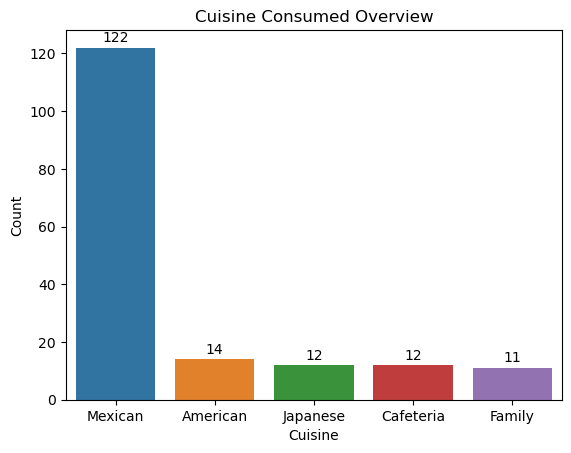

In [114]:
#check the cusine consumed by the consumer

value_count_cusine = df_consumer_Data['Rcuisine'].value_counts().reset_index()
value_count_cusine = value_count_cusine.sort_values(by='Rcuisine', ascending=False)
top_5_cuisine = value_count_cusine.head(5)

b = sns.barplot(x='index', y='Rcuisine', data=top_5_cuisine)

#ADD the lables for the bar plot

for index, row in top_5_cuisine.iterrows():
    b.text(row.name, row.Rcuisine+2, row.Rcuisine, color='black', ha="center")

plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Cuisine Consumed Overview')

In [115]:
df_consumer_Data['Upayment'].drop_duplicates()

0                    cash
12       bank_debit_cards
45    MasterCard-Eurocard
65                   VISA
83       American_Express
Name: Upayment, dtype: object

Text(0.5, 1.0, 'Payment Type Overview')

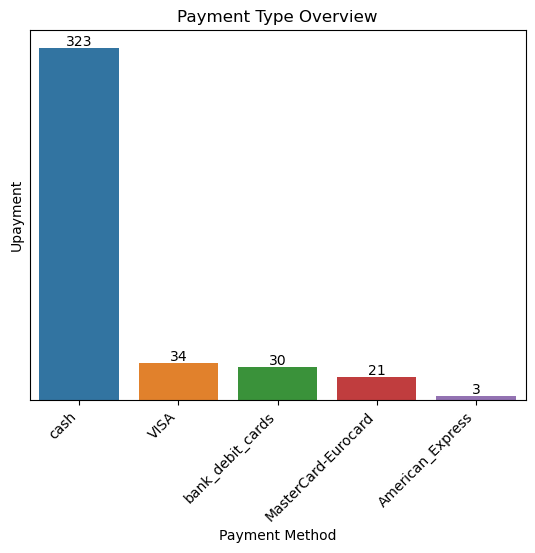

In [116]:
# Check the Payment methods prefered by the consumers

value_count_pay = df_consumer_Data['Upayment'].value_counts().reset_index().sort_values(by='Upayment', ascending=False)
top_5_pay_type = value_count_pay.head(5)

c = sns.barplot(x='index', y='Upayment', data=top_5_pay_type)

for index, row in top_5_pay_type.iterrows():
    c.text(row.name, row.Upayment+2, row.Upayment, color='black', ha='center')

plt.xlabel('Payment Method')
plt.yticks([])
plt.xticks(rotation=45, ha='right')
plt.title('Payment Type Overview')


In [117]:
df_consumer_Data['drink_level'].value_counts()

casual drinker    206
abstemious        137
social drinker     68
Name: drink_level, dtype: int64

Text(0.5, 1.0, 'Drink level overview')

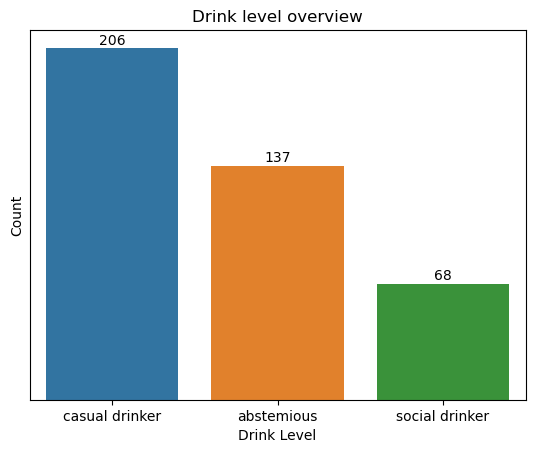

In [118]:
#Plot the drink levels

value_count_drink = df_consumer_Data['drink_level'].value_counts().reset_index()
d = sns.barplot(data=value_count_drink, x='index', y='drink_level')

for index, row in value_count_drink.iterrows():
    d.text(row.name, row.drink_level+2, row.drink_level, color='black', ha='center')

plt.xlabel('Drink Level')
plt.ylabel('Count')
plt.yticks([])
plt.title('Drink level overview')


In [119]:
df_consumer_Data['birth_year'].value_counts()

1988    126
1991     67
1983     59
1989     44
1990     26
1940     18
1987     17
1992      8
1985      8
1986      7
1930      6
1984      6
1982      6
1969      4
1979      2
1967      2
1994      1
1943      1
1952      1
1981      1
1993      1
Name: birth_year, dtype: int64

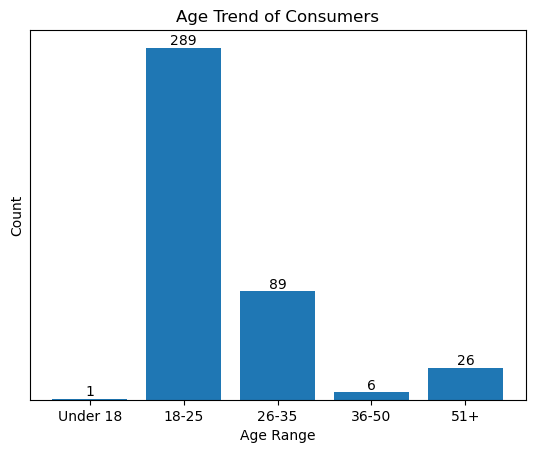

In [120]:
#plot the age range of the consumers
# the Dataset was published in 2012 and therefore, I am using that year to calculate the aga

import datetime


# Calculate the age based on birth year
current_year = 2012
df_consumer_Data['Age'] = current_year - df_consumer_Data['birth_year']

# Create the age range column
age_bins = [0, 18, 25, 35, 50, 200]
age_labels = ['Under 18', '18-25', '26-35', '36-50', '51+']
df_consumer_Data['Age Range'] = pd.cut(df_consumer_Data['Age'], bins=age_bins, labels=age_labels)

# Count the number of consumers in each age range
age_counts = df_consumer_Data['Age Range'].value_counts().sort_index()

# Plot the age trend
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Trend of Consumers')
plt.yticks([])

for i, count in enumerate(age_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.show()

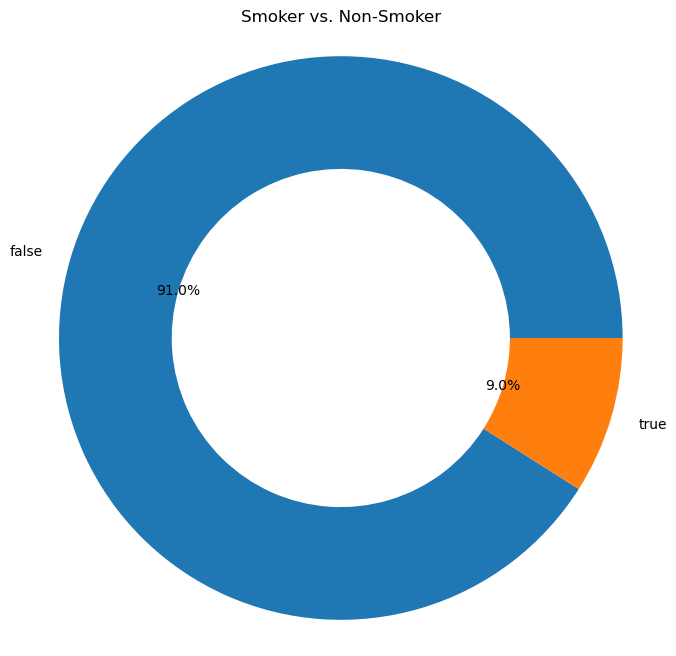

In [123]:
# Count the occurrences of each category
value_counts_smoker = df_consumer_Data['smoker'].value_counts()

# Create a larger figure
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(value_counts_smoker.values, labels=value_counts_smoker.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))

plt.title('Smoker vs. Non-Smoker')
plt.axis('equal')  # Ensure a circular pie chart

plt.show()


In [151]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00


In [152]:
import folium

# Concatenate latitude and longitude values from both DataFrames
combined_latitudes = pd.concat([df_consumer_Data['latitude'], df_res_rating['latitude']])
combined_longitudes = pd.concat([df_consumer_Data['longitude'], df_res_rating['longitude']])

# Create a map centered at the mean latitude and longitude values
map_center = [combined_latitudes.mean(), combined_longitudes.mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add points from first DataFrame
for index, row in df_consumer_Data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup='DataFrame 1', icon=folium.Icon(color='blue')).add_to(m)

# Add points from second DataFrame
for index, row in df_res_rating.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup='DataFrame 2', icon=folium.Icon(color='red')).add_to(m)

# Display the map
m
